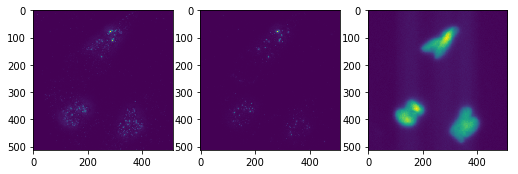

In [65]:
from skimage.io import imread, imshow
from skimage import img_as_float
from numpy import mean, median, std, max
from matplotlib.pyplot import subplots

tifFilePath = '/home/jiongyi/Documents/DNA repair factor colocalization shit/20180902/slides from 20180818/WT/2 gamma/WT ATM 2g 1hr postIR/wt atm 2g 1hr_1/wt atm 2g 1hr_1_MMStack.ome.tif'
lambdaZStack = img_as_float(imread(tifFilePath))

lambda1Stack = lambdaZStack[0, :, :, :]
lambda2Stack = lambdaZStack[1, :, :, :]
lambda3Stack = lambdaZStack[2, :, :]

meanLambda1Img = mean(lambda1Stack, axis = 0)
meanLambda2Img = mean(lambda2Stack, axis = 0)
meanLambda3Img = mean(lambda3Stack, axis = 0)

stdLambda1Img = std(lambda1Stack, axis = 0)
stdLambda2Img = std(lambda2Stack, axis = 0)
stdLambda3Img = std(lambda3Stack, axis = 0)

maxLambda1Img = max(lambda1Stack, axis = 0)
maxLambda2Img = max(lambda2Stack, axis = 0)
maxLambda3Img = max(lambda3Stack, axis = 0)

lambda1Img = maxLambda1Img - meanLambda1Img
lambda2Img = maxLambda2Img - meanLambda2Img
lambda3Img = mean(lambda3Stack, axis = 0)

figObj, axObj = subplots(ncols=3, nrows=1)
figObj.set_figheight(11)
figObj.set_figwidth(8.5)
axObj[0].imshow(lambda1Img)
axObj[1].imshow(lambda2Img)
axObj[2].imshow(lambda3Img)

/home/jiongyi/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


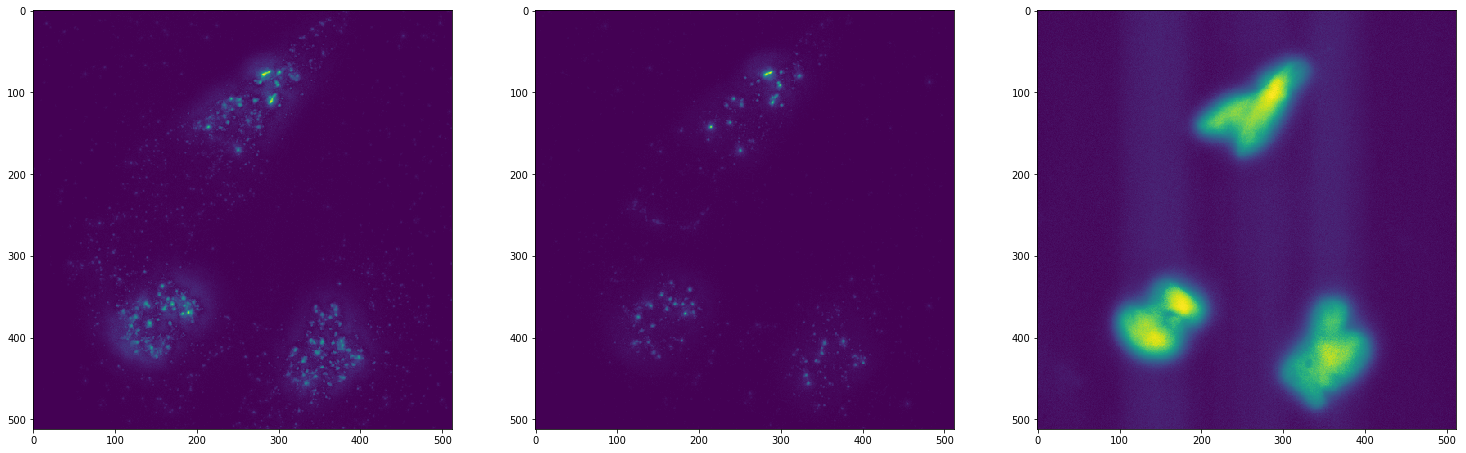

In [66]:
from skimage.exposure import equalize_adapthist

eqLambda1Img = equalize_adapthist(lambda1Img)
eqLambda2Img = equalize_adapthist(lambda2Img)
eqLambda3Img = equalize_adapthist(lambda3Img)

figObj, axObj = subplots(ncols=3, nrows=1)
figObj.set_figheight(11 * 3)
figObj.set_figwidth(8.5 * 3)
axObj[0].imshow(eqLambda1Img)
axObj[1].imshow(eqLambda2Img)
axObj[2].imshow(eqLambda3Img)

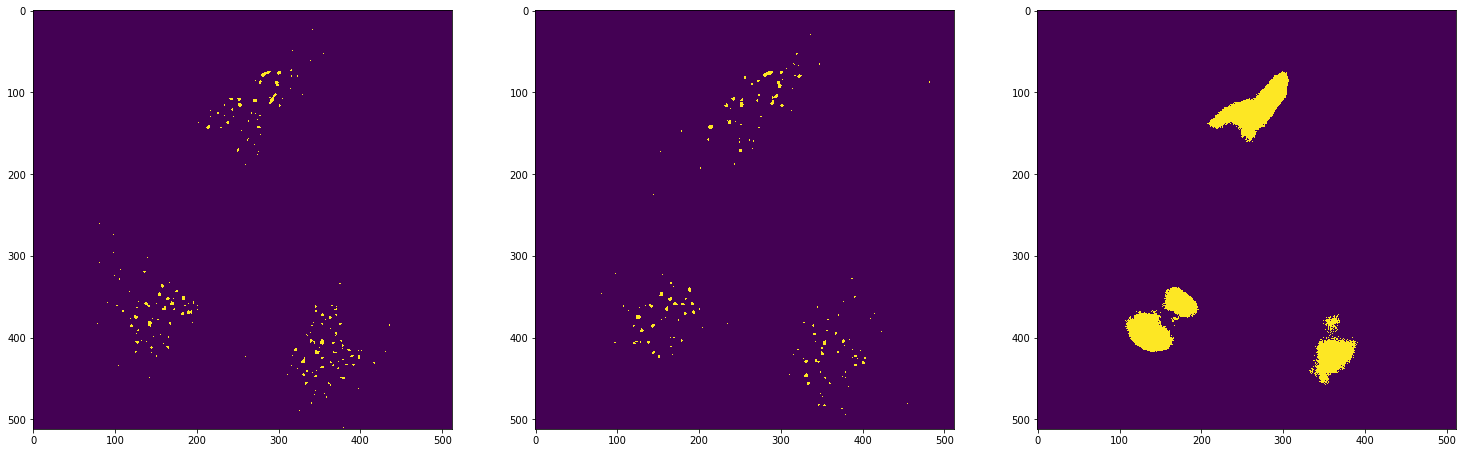

In [62]:
from skimage.filters import threshold_local
figObj, axObj = subplots(ncols=3, nrows=1)
figObj.set_figheight(11 * 3)
figObj.set_figwidth(8.5 * 3)
axObj[0].imshow(eqLambda1Img > threshold_local(eqLambda1Img, block_size=21, offset=-3*std(eqLambda1Img.flatten())))
axObj[1].imshow(eqLambda2Img > threshold_local(eqLambda2Img, block_size=21, offset=-3*std(eqLambda2Img.flatten())))
axObj[2].imshow(eqLambda3Img > threshold_local(eqLambda3Img, block_size=501, offset=-3*std(eqLambda3Img.flatten())))

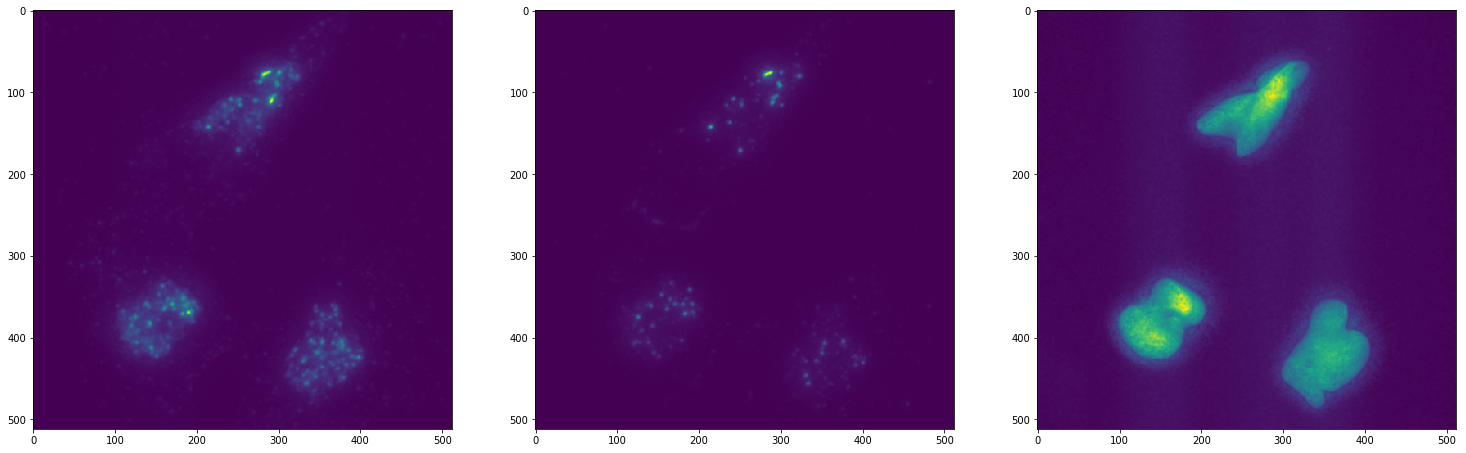

In [123]:
from numpy import zeros, argmax, arange
from skimage.filters import gaussian, sobel

def extended_depth_field(stack):
    noStacks, noRows, noCols = stack.shape
    gaussStack = zeros((noStacks, noRows, noCols))
    sobelStack = zeros((noStacks, noRows, noCols))
    for i in range(noStacks):
        sobelStack[i, :, :] = sobel(stack[i, :, :])
    idxMaxEdgeImg = argmax(sobelStack, axis = 0)
    stack = stack.reshape((noStacks, -1))
    stack = stack.transpose()
    extDepthImg = stack[arange(len(stack)), idxMaxEdgeImg.ravel()]
    extDepthImg = extDepthImg.reshape((noRows, noCols))
    return gaussian(extDepthImg)

extDepthLambda1Img = extended_depth_field(lambda1Stack)
extDepthLambda2Img = extended_depth_field(lambda2Stack)
extDepthLambda3Img = extended_depth_field(lambda3Stack)

figObj, axObj = subplots(ncols=3, nrows=1)
figObj.set_figheight(11 * 3)
figObj.set_figwidth(8.5 * 3)
axObj[0].imshow(extDepthLambda1Img)
axObj[1].imshow(extDepthLambda2Img)
axObj[2].imshow(extDepthLambda3Img)

/home/jiongyi/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


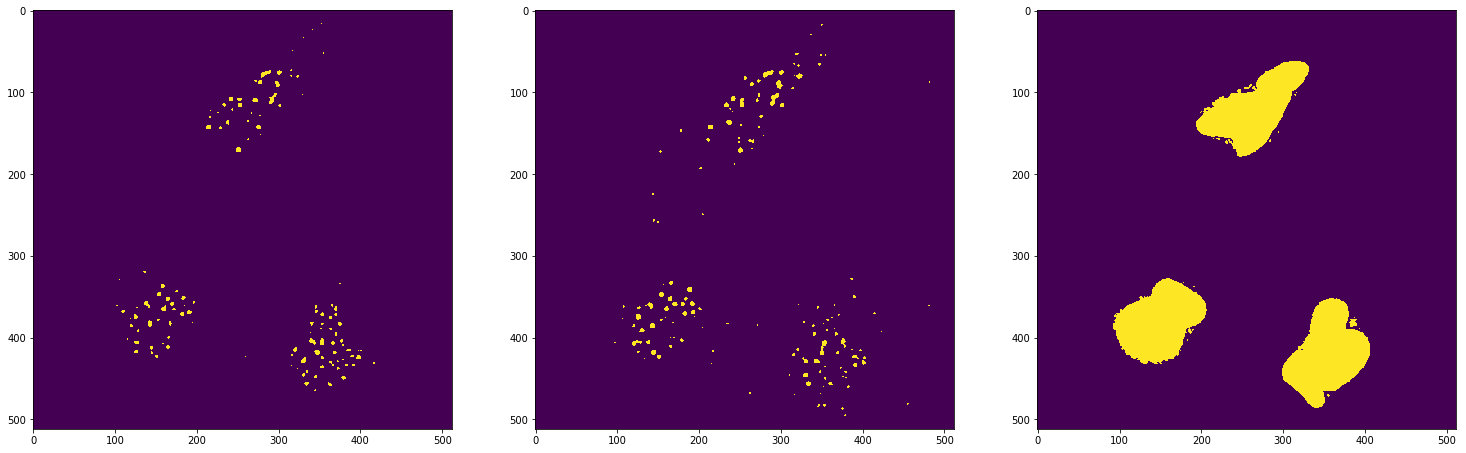

In [147]:
eqLambda1Img = equalize_adapthist(extDepthLambda1Img)
eqLambda2Img = equalize_adapthist(extDepthLambda2Img)
eqLambda3Img = equalize_adapthist(extDepthLambda3Img)
figObj, axObj = subplots(ncols=3, nrows=1)
figObj.set_figheight(11 * 3)
figObj.set_figwidth(8.5 * 3)
axObj[0].imshow(eqLambda1Img > threshold_local(eqLambda1Img, block_size = 21, offset=-1*std(eqLambda1Img.flatten())))
axObj[1].imshow(eqLambda2Img > threshold_local(eqLambda2Img, block_size = 21, offset=-1*std(eqLambda2Img.flatten())))
axObj[2].imshow(eqLambda3Img > threshold_local(eqLambda3Img, block_size = 501, offset=-1*std(eqLambda3Img.flatten())))